In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [4]:
import pubplot

from   vmaxer        import vmaxer
from   astropy.table import Table
from   smith_kcorr   import test_plots, test_nonnative_plots
from   cosmo         import distmod

##  kE Catalog

In [5]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DDPKCORR_R0P1,DDPKCORR_G0P1,DDPKCORR_R0P0,DDPKCORR_G0P0,DDPMALL_0P0
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,,,,,mag
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64
186621,587725041704829065,185.22637399,-1.48484552,19.707304,0.15655,4,G12_Y3_013_084,5,21.00796,20.179195,19.758118,19.538584,19.657133,526.2218840329729,38.60584452582876,G12,-452.949002915617,-41.43182242297258,-11.790018871544799,0.42107773,0.3371333695571266,0,2,-0.11110247733432752,-0.027158118619969737,0.06198855923223209,0.15099516113794287,0.33207112636577363,2.12,-0.15185352,-0.331886,-18.808675567508615,-18.628643090725816,38.51597956836311,38.33594709158031,-0.06727912768008276,0.029344341562804438,0.14944575068211835,0.29451963127646774,-18.8961327589585
543518,588848898852848091,211.76792957,-0.89235905,19.017689,0.05258,4,G15_Y3_013_228,6,20.9524,19.807358,19.110891,18.695219,18.314579,164.25889781301044,36.07764452179613,G15,-132.65873114579134,-82.14913456297639,-2.4303746870844907,0.69646645,0.7649974613944354,0,5,-0.15789098198346954,-0.22642199745535949,0.06992529999751626,0.0987676138300845,0.6676241320902834,0.8,-0.0510026,-0.042064,-17.078878471273992,-17.087817070651862,36.09656722249469,36.10550582187256,-0.14680015512782418,-0.19364531489911876,0.06992472323437693,0.07152997481454451,-17.07887789451085
145492,587724650869751862,184.80116057,-1.36268178,18.077238,0.10614,4,G12_Y1_IS1_187,6,19.808687,18.545658,18.033491,17.711723,17.538279,344.76795967919503,37.68763449369432,G12,-310.50414838876634,-26.080095695731455,-7.412209189910756,0.512167,0.5042607723990307,0,3,-0.1005257374319281,-0.09261953290224781,0.09945360289805828,0.13844408330998506,0.4731764965167842,2.12,-0.1029558,-0.22501679,-19.606894210431527,-19.484833226058434,37.68413229331727,37.56207130894418,-0.09889375873716971,-0.09026459990901585,0.1178311196250314,0.1749106898046474,-19.6252717271585
136410,587724650328490122,174.75681895,-1.77149809,18.929632,0.10328,5,369383993293957120,6,19.882893,19.167995,18.922789,18.57444,18.607363,334.80363253505897,37.623950806662464,G12,-302.0479121081842,27.718053402410643,-9.381089858155741,0.24520683,0.24179980777578158,0,2,-0.10417277610092178,-0.10076575099096118,0.060910488024232726,0.05270176921079077,0.25341555169918417,2.12,-0.1001816,-0.2189536,-18.655047505855464,-18.536275513231658,37.58467969274511,37.465907700121306,-0.1010062713102715,-0.09646160454835392,0.11571860705192961,0.16871368516530935,-18.709855624883158
3854067,588010930294358518,130.11971293,-1.67349372,19.1169,0.23578,4,G09_Y4_233_079,6,20.588625,19.796408,19.077488,18.744814,18.56107,832.7157631522992,39.602483929243604,G9,-434.0272135973507,515.0641120150214,-19.67865112089697,0.71891975,0.46062719543598274,0,3,-0.0858318620858185,0.17246069650651913,0.10674750418857665,0.3884501181232859,0.43721714009361107,2.12,-0.22870661,-0.49985358,-20.363625329892713,-20.092478361885625,39.48052482024916,39.20937785224207,-0.027117387384516245,0.2451168051414711,0.18960749097768487,0.5102920948551344,-20.446485316681823
69798,587722983349223510,176.60336,0.08453731,18.432463,0.26182,4,MGC24311,6,20.21734,19.261951,18.36527,18.007675,17.615719,938.8319759982534,39.8629393648112,G12,-742.7222141875054,44.082121062425216,1.0977820234836277,0.89668083,0.5680527902726428,0,4,-0.0301386947872311

In [40]:
def color_plot(ctype, xlabel=None, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    if xlabel == None:
        xlabel = ctype
    
    for count, jj in enumerate(np.unique(idx)):
        sample  = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, lw=2, color=colors[count], label=r'{:.0f} $\leq M_r \leq$ {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)

    plt.xlabel(xlabel)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    
    plt.xlim(-0.1, max_col)
    
    plt.legend(frameon=False)

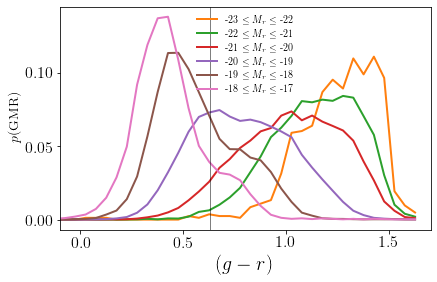

In [41]:
color_plot('GMR', '$(g-r)$', max_col=1.7)

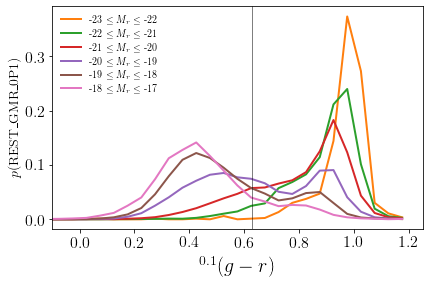

In [44]:
color_plot('REST_GMR_0P1', '$^{0.1}(g-r)$', max_col=1.25)

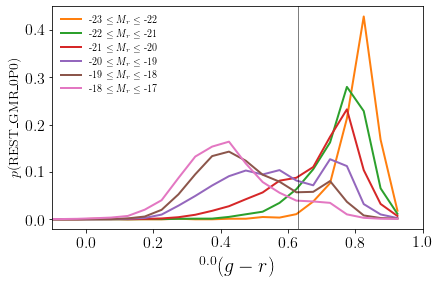

In [45]:
color_plot('REST_GMR_0P0', '$^{0.0}(g-r)$')

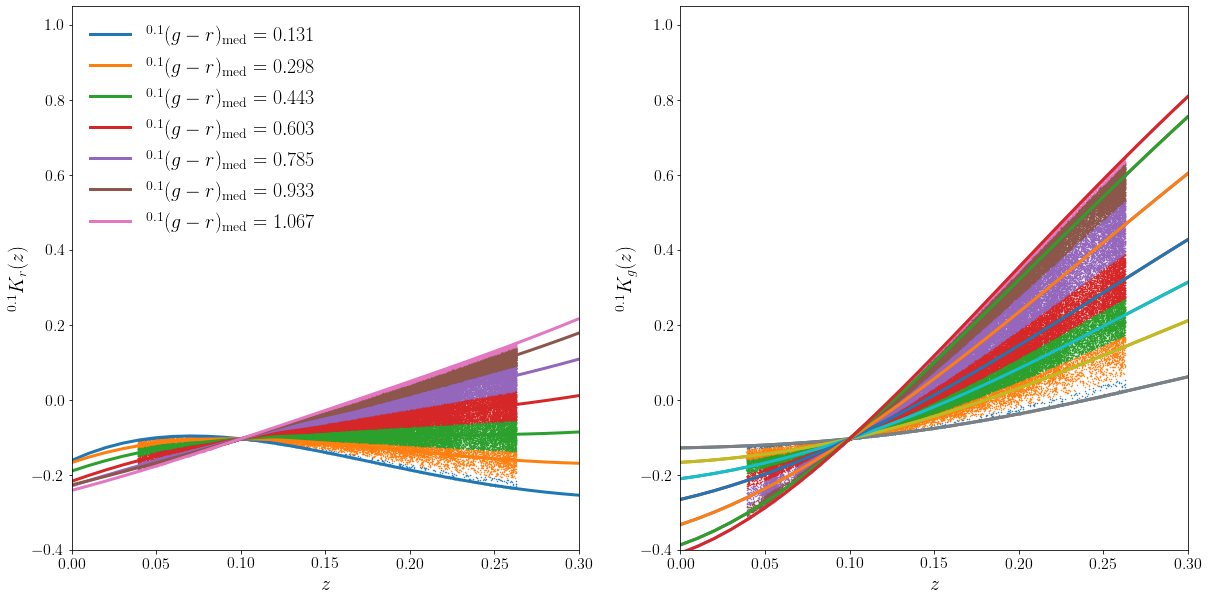

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)
axes[1].get_legend().remove()

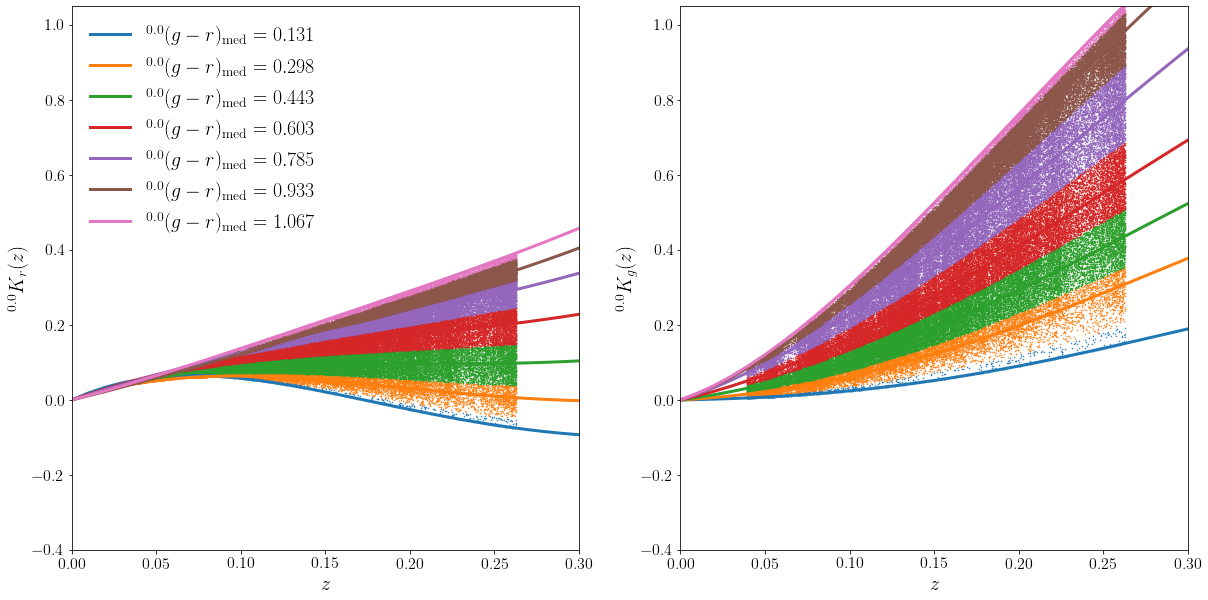

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2, fontsize=20)

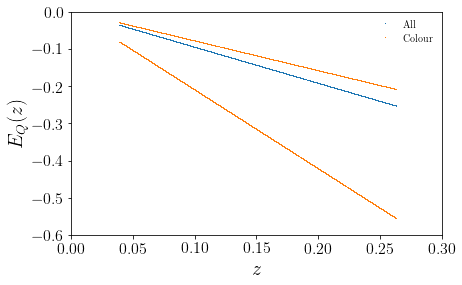

In [61]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Colour')

pl.xlabel(r'$z$')
pl.ylabel(r'$E_Q(z)$')

pl.xlim(0.0,0.3)
pl.ylim(-0.6, 0.0)

pl.legend(frameon=False)

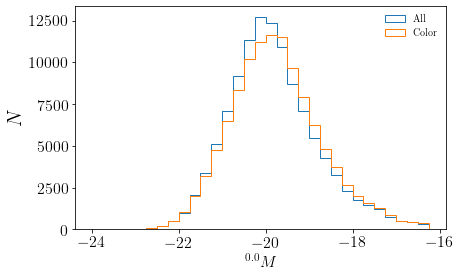

In [62]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)
pl.ylabel('$N$')

pl.legend(frameon=False)

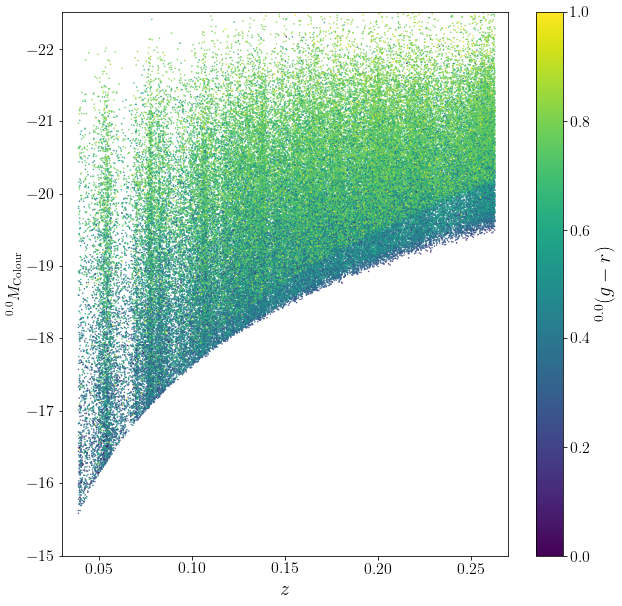

In [64]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$z$')
plt.ylabel(r'$^{0.0}M_{\rm Colour}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)

plt.colorbar(label = r'$^{0.0}(g-r)$')

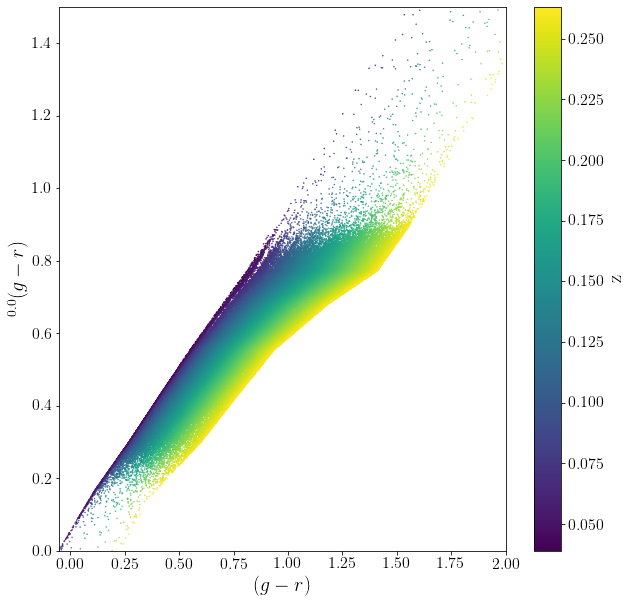

In [66]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)$')
plt.ylabel(r'$^{0.0}(g-r)$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='z')

# Done.